[0 2 2 2 0 2 2 1 0 1 0 4 0 1 2 3 1 4 0 3 1 1 4 1 3 2 4 1 4 1 4 0 4 2 4 4 2
 1 3 0 0 3 0 3 4 1 1 2 3 2]


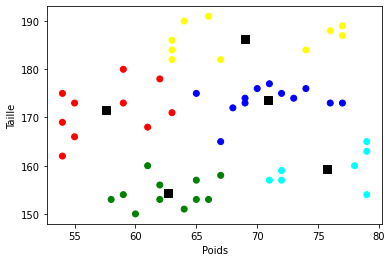

<Figure size 432x288 with 0 Axes>

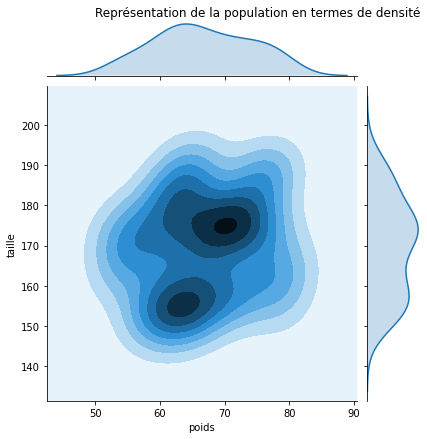

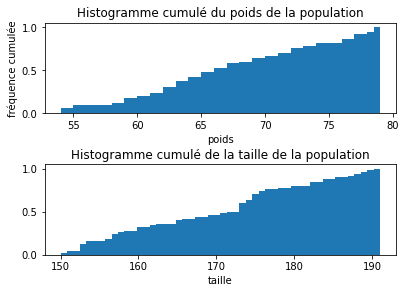

NameError: name 'figur' is not defined

In [17]:
#Importation des modules
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import seaborn as sns
 
#Génération des données
np.random.seed(1)
poids = np.random.randint(54,80,50)
taille = np.random.randint(150,193,50)

#Préparation du format des données
data = np.concatenate(([[poids,taille]]),axis=0)
data = data.transpose()

#Création de l'instance de machine learning non supervisé (Algorithme K-Means)
kmeans2 = KMeans(n_clusters=5, random_state=21)
kmeans2.fit(data)
output2 = kmeans2.predict(data)

#Identification des centroïdes
centers = np.array(kmeans2.cluster_centers_)

#Définition de la couleur des clusters et affichage de ces derniers
colormap=np.array(['Red','blue','green','cyan','yellow'])
plt.scatter(data[:,0],data[:,1], c=colormap[kmeans2.labels_])

#Affichage des centroïdes
plt.scatter(centers[:,0],centers[:,1],marker='s',c='black',s=50)

#Nom des axes du plan 
plt.xlabel('Poids')
plt.ylabel('Taille')

#Impression des classes générées par l'algorithme
print(output2)

#Affichage de tous les graphiques précédents
plt.show()

#Définition d'un DataFrame contenant les données d'entrées et leur cluster d'appartenance. 
df = pd.DataFrame({'poids':data[:,0],'taille':taille,'output':output2})
mapping = {0:'Poids léger & taille moyenne',1:'Poids moyen & grand',2:'Poids lourd & petite taille',3:'Poids moyen & taille moyenne (petite)',4:'Poids moyen & taille moyenne (grande)'}
df['output']= df.output.map(mapping)


#Création d'un graphique de "densité" combinant les données d'entrées
plt.figure()
sns.jointplot(x='poids',y='taille',data=df,kind='kde')
plt.title('Représentation de la population en termes de densité',pad=80,loc='right')
plt.show()


#Création d'histogrammes cumulatifs permettant d'appréhender la répartition de la population générée
plt.figure()
plt.subplot(2,1,1)
plt.hist(df['poids'], density=True, cumulative=True,bins=50)
plt.title('Histogramme cumulé du poids de la population')
plt.xlabel('poids')
plt.ylabel('fréquence cumulée')
plt.tight_layout(pad=2)
plt.subplot(2,1,2)
plt.hist(df['taille'],density=True,cumulative=True,bins=50)
plt.title('Histogramme cumulé de la taille de la population')
plt.xlabel('taille')

plt.show()

#Création d'une fonction d'ECDF et utilisation de cette dernière pour classifier et observer statistiquement la population étudiée
def ecdf(data):
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

x,y = ecdf(df['poids'])
x_,y_ = ecdf(df['taille'])
figur
plt.subplot(2,1,1,)
plt.scatter(x,y,marker='.')
plt.title('Fonction de distribution cumulative (poids)')
plt.xlabel('poids')
plt.ylabel('fréquence cumulée')
plt.show()
plt.subplot(2,1,2)
plt.scatter(x_,y_,marker='.')
plt.title('Fonction de distribution cumulative (taille)')
plt.xlabel('taille')
plt.ylabel('fréquence cumulée')
plt.show()

#Affichage du dataframe contenant les données d'entrées et leur cluster d'appartenance.
print(df)